In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

# models from sklearn
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection  import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics  import confusion_matrix , classification_report
from sklearn.metrics  import precision_score , recall_score , f1_score
from sklearn.metrics  import plot_roc_curve

Load Data

In [7]:
df = pd.read_csv("C:/Users/HP/Downloads/archive (2)/heart.csv")
df.shape

(303, 14)

In [8]:
## data exploration (EDA)
df['target'].value_counts()  

1    165
0    138
Name: target, dtype: int64

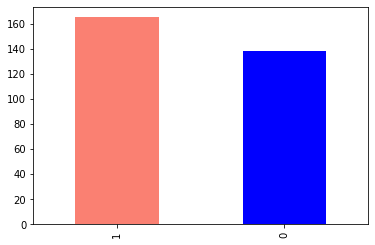

In [9]:
 df['target'].value_counts().plot(kind="bar" , color=["salmon" , "blue"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Heart frequency according to sex

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

 plot of crosstab between sex and target

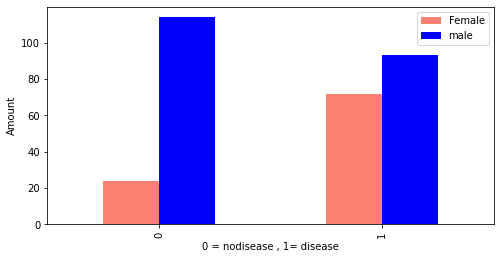

In [18]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(8,4), color=["salmon" , "blue"])
plt.xlabel("0 = nodisease , 1= disease")
plt.ylabel("Amount")
plt.legend(["Female","male"])


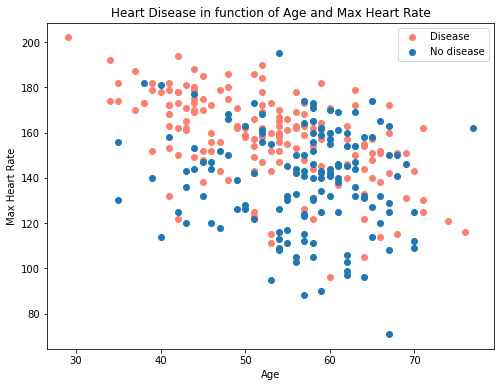

In [23]:
#create  new fig
plt.figure(figsize=(8,6))

#scatter with positive examples
plt.scatter(df.age[df.target == 1] , df.thalach[df.target==1], c="salmon")

#scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0])

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease" , "No disease"])

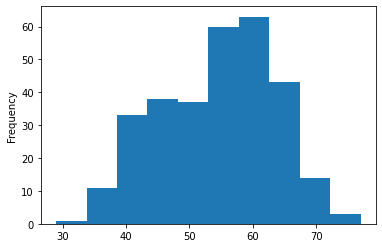

In [26]:
 #age column with histogram
df.age.plot.hist();

In [27]:
# make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

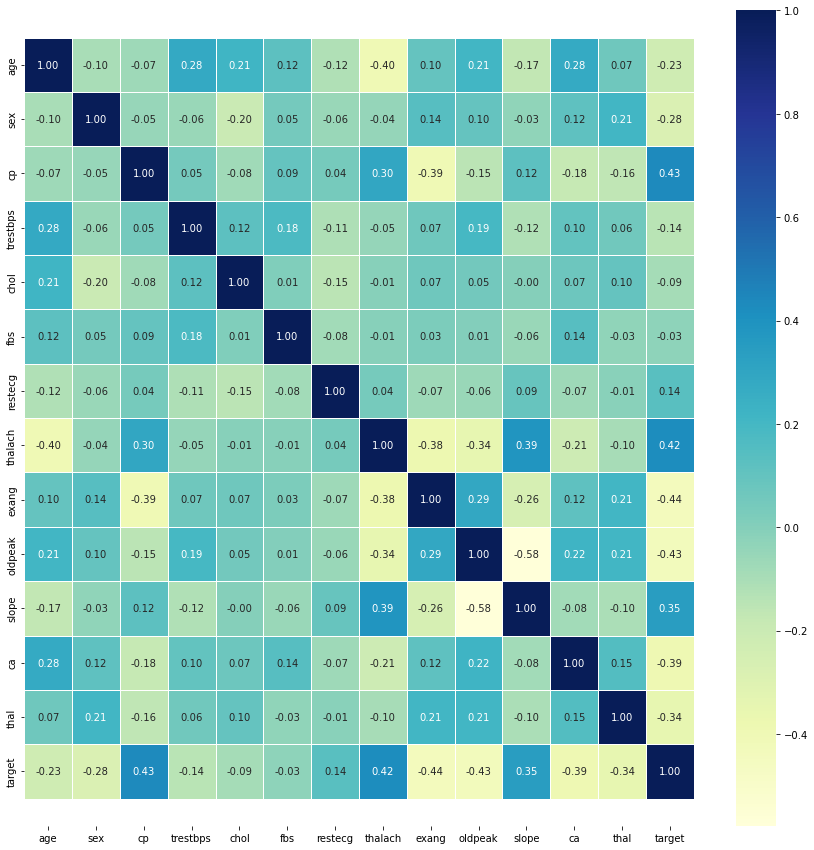

In [31]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,annot = True, linewidths =0.5,
                cmap="YlGnBu", fmt = ".2f")
bottom , top = ax.get_ylim()
ax.set_ylim(bottom + 0.5 ,top -0.5 )

In [32]:
# Data preparation for model training
x = df.drop("target" , axis=1)

y= df["target"]

In [33]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [106]:
#performing train_test split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

# Model training  

1. Logistic Regression
2. Knn
3. Random forest Classifier

In [108]:
models = {"LogisticRegression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random_forest": RandomForestClassifier()}

#create function to fit and score models
def fit_model(models,xtrain,ytrain,xtest,ytest):
    model_scores={}
    #loop through models
    for name , model in models.items():
        #fit the model to data
        model.fit(xtrain,ytrain)
        #evaluate model and append score to model_scores
        model_scores[name] = model.score(xtest,ytest)
    return model_scores

In [109]:
model_scores = fit_model(models,xtrain,ytrain,xtest,ytest)
model_scores

{'LogisticRegression': 0.8461538461538461,
 'KNN': 0.6263736263736264,
 'Random_forest': 0.8461538461538461}

<AxesSubplot:>

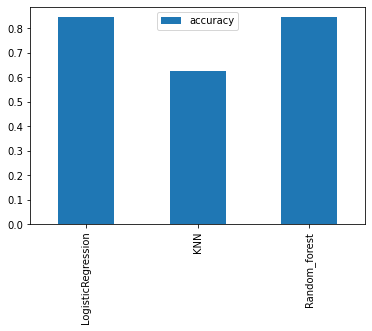

In [110]:
model = pd.DataFrame(model_scores,index=["accuracy"])
model.T.plot.bar()

In [111]:
#hyperparameter tunning
#Feature importance
#confusion matrix
#cross-validation
#precision
#recall
#F1 score
#classification report
#ROc report
#Area under the curve(AUC)

In [112]:
### Hyperparameter tunning

In [113]:
train_scores = []
test_scores = []

#create a list of different values for n neighbors

n_neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit algo
    knn.fit(xtrain,ytrain)
    
    #update training scores list
    train_scores.append(knn.score(xtrain,ytrain))
    
    #update the test scores list
    test_scores.append(knn.score(xtest ,ytest))

In [114]:
train_scores

[1.0,
 0.7830188679245284,
 0.8018867924528302,
 0.7830188679245284,
 0.7311320754716981,
 0.7311320754716981,
 0.7075471698113207,
 0.6981132075471698,
 0.7216981132075472,
 0.6981132075471698,
 0.7169811320754716,
 0.6886792452830188,
 0.6745283018867925,
 0.6839622641509434,
 0.7028301886792453,
 0.6745283018867925,
 0.6839622641509434,
 0.6650943396226415,
 0.6839622641509434,
 0.660377358490566]

In [115]:
test_scores

[0.5714285714285714,
 0.5714285714285714,
 0.5824175824175825,
 0.6153846153846154,
 0.6263736263736264,
 0.6263736263736264,
 0.6813186813186813,
 0.6373626373626373,
 0.7032967032967034,
 0.6373626373626373,
 0.6813186813186813,
 0.6813186813186813,
 0.7032967032967034,
 0.7032967032967034,
 0.7032967032967034,
 0.6593406593406593,
 0.6593406593406593,
 0.6373626373626373,
 0.6263736263736264,
 0.6263736263736264]

maximum KNN score on test data : 70.32967032967034


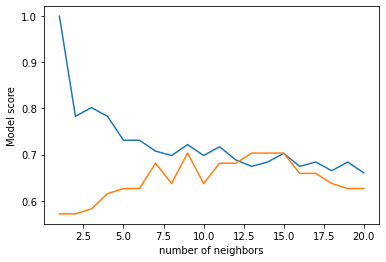

In [116]:
plt.plot(neighbors ,train_scores , label="Train score")
plt.plot(neighbors ,test_scores , label="Test score")
plt.xlabel("number of neighbors") 
plt.ylabel("Model score")
plt.legend

print("maximum KNN score on test data :",max(test_scores)*100)

# Hyperparameter tunning with Random Forest

In [117]:
#creating hyperparameter grid for logisticregression
log_grid = {"C": np.logspace(-4,4,20),
           "solver": ["liblinear"]}
#create hyperparamete grid for RandomForestClassifier
rf_grid= {"n_estimators" : np.arange(10,1000,50),
         "max_depth": [None,3,5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)}

In [118]:
#tune logistic Regression

#setup random hyperparameter search for logistics regession
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [119]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [120]:
rs_log_reg.score(xtest,ytest)

0.8791208791208791

In [121]:
#setup random hyperparameter search for RandomForstClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv=5,
                          n_iter = 20,
                          verbose=True)
#fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [122]:
#find best hyper parameter
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [123]:
rs_rf.score(xtest,ytest)

0.8571428571428571

# Evaluating a classification model, beyond accuracy
Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:

ROC curve and AUC score - plot_roc_curve()
Confusion matrix - confusion_matrix()
Classification report - classification_report()
Precision - precision_score()
Recall - recall_score()
F1-score - f1_score()

In [127]:
# Make preidctions on test data
y_preds = rs_log_reg.predict(xtest)
y_preds

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

# ROC Curve and AUC Scores

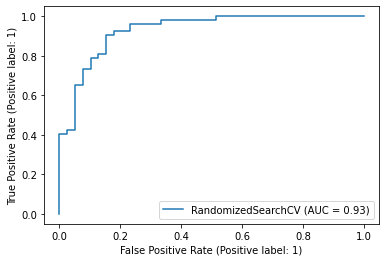

In [130]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg, xtest, ytest);

# Confusion matrix

In [132]:
print(confusion_matrix(ytest,y_preds))

[[30  9]
 [ 2 50]]


# Classification report

In [133]:
print(classification_report(ytest,y_preds))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        39
           1       0.85      0.96      0.90        52

    accuracy                           0.88        91
   macro avg       0.89      0.87      0.87        91
weighted avg       0.89      0.88      0.88        91



# Predicting for Heart Disease

In [142]:
ypredict = rs_log_reg.predict([[64,0,0,180,325,0,1,154,1,0.0,2,0,1]])
if ypredict[0]==1:
    print("Person has Heart Disease")
else:
    print("Person doesn't have Heart Disease")

Person has Heart Disease
